In [1]:
%matplotlib inline
from dotblotr import BlotConfig
from dotblotr.image import get_intensities, get_intensities_from_mask
from dotblotr.viz import plot_zscore

In [2]:
blot_config_path = '../configs/384WellPlate_config.json'
im_path = './1536_680nm.tif'
blot_data_680 = get_intensities(im_path=im_path, blot_config_path=blot_config_path)

In [3]:
blot_data_680.df.head()

,blot_label,blob_label,row,col,x,y,mean_intensity,area
0,A10,1,0,9,1435.320911,222.896480,226.542443,483
1,A11,2,0,10,1524.774390,223.040650,232.630081,492
2,A12,3,0,11,1616.547389,222.698259,231.081238,517
3,A14,4,0,13,1797.864312,222.628253,220.579926,538
4,A8,5,0,7,1253.115619,223.801217,217.308316,493


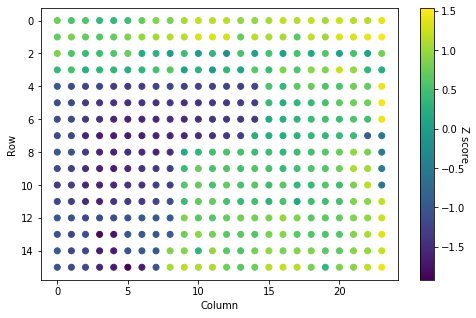

In [4]:
f, ax, cb = plot_zscore(blot_data_680.df)

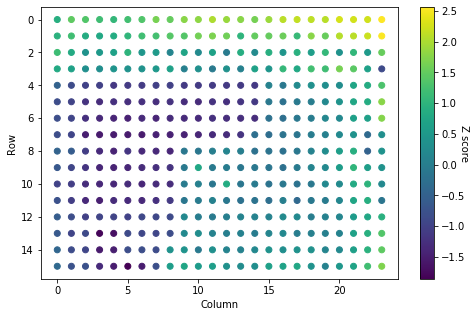

In [5]:
im_path = im_path = './1536_800nm.tif'
blot_data_800 = get_intensities_from_mask(im_path, blot_data_680)
f2, ax2, cb2 = plot_zscore(blot_data_800.df)

In [6]:
import pandas as pd
control_df = blot_data_680.df
probe_df = blot_data_800.df[['blot_label', 'mean_intensity']]

new_df = pd.merge(control_df, probe_df, on='blot_label', how='outer', suffixes=('_control', '_probe'))

In [7]:
from dotblotr.image import quantify_blot_array

control_path = './1536_680nm.tif'
probe_path = './1536_800nm.tif'
blot_config_path = '../configs/384WellPlate_config.json'

assay_results = quantify_blot_array(
    control_image=control_path,
    probe_image=probe_path,
    array_config_path=blot_config_path,
    assay_config_path = 'test'
)

In [8]:
assay_results

,blot_label,blob_label,row,col,x,y,mean_intensity_control,area,mean_intensity_probe
0,A10,1,0,9,1435.320911,222.896480,226.542443,483,220.983437
1,A11,2,0,10,1524.774390,223.040650,232.630081,492,221.977642
2,A12,3,0,11,1616.547389,222.698259,231.081238,517,229.682785
3,A14,4,0,13,1797.864312,222.628253,220.579926,538,221.198885
4,A8,5,0,7,1253.115619,223.801217,217.308316,493,216.916836
...,...,...,...,...,...,...,...,...,...
379,P19,426,15,18,2243.227818,1583.395683,214.966427,417,172.031175
380,P21,427,15,20,2426.143541,1583.813397,216.287081,418,175.485646
381,P23,428,15,22,2604.701099,1586.298901,231.920879,455,200.903297
382,P22,429,15,21,2513.768293,1587.611789,218.609756,492,182.979675
